<a href="https://colab.research.google.com/github/maielhadad99/Hand_Writting_Recognition_Project/blob/main/Hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing datasets

from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


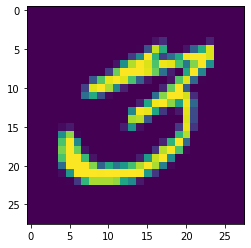

In [12]:
#EDA Plotting the image
plt.imshow(trainsetX[1119])
plt.show()

In [13]:
#checking the image 
print(trainsety[1119])

3


In [14]:
#Array of the image
print(trainsetX[1119])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  32
    0   0   0   0   0  23   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  65 233 159
    0   0  14  80 158 241   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  44 121 254 166  51
   93 155 251 254 254 241   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  14 127 226 254 242 184 249
  245 183 102 208 253 131   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  46 197 254 254 254 24

In [15]:
import tensorflow as tf

In [16]:
#train test split
Xtrain=tf.keras.utils.normalize(trainsetX,axis=1)
Xtest=tf.keras.utils.normalize(testsetX,axis=1)

In [17]:
#setting up the image size
IMG_SIZE=28
x_trainr=np.array(Xtrain).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(Xtest).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
#importing the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D

In [19]:
#fiting the model
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#Relu activation
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [21]:
#segmoid activation
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [22]:
#base model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [23]:
#CNN
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [24]:
#fitting the model and Epochs
model.fit(x_trainr,trainsety,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 45s 33ms/step - loss: 0.2384 - accuracy: 0.9300 - val_loss: 0.1224 - val_accuracy: 0.9644
Epoch 2/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0815 - accuracy: 0.9753 - val_loss: 0.0891 - val_accuracy: 0.9738
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0771 - val_accuracy: 0.9769
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0716 - val_accuracy: 0.9788


In [25]:
#predicting
prediction=model.predict([x_testr])
print(prediction)

[[7.5530035e-05 1.4147162e-03 1.7735696e-01 ... 9.9999988e-01
  2.9644763e-01 2.6599079e-02]
 [8.7493986e-01 9.8313457e-01 1.0000000e+00 ... 6.8413588e-05
  2.1303028e-02 3.4746643e-09]
 [2.1900982e-02 9.9998397e-01 1.1491477e-03 ... 4.9524009e-03
  2.5226623e-02 2.4770200e-03]
 ...
 [2.4241209e-04 8.8787377e-03 9.3944880e-05 ... 8.9924395e-02
  9.6393883e-01 9.3996644e-01]
 [4.3437779e-03 1.8504560e-03 5.6937670e-06 ... 4.8041016e-02
  9.9340451e-01 1.8926680e-02]
 [3.1653404e-01 5.2688479e-02 5.4780781e-01 ... 4.9025217e-05
  9.0004504e-03 2.7561027e-06]]


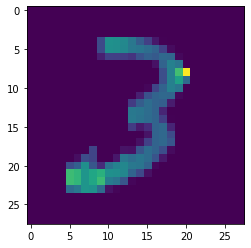

In [27]:
#verifing the model
plt.imshow(Xtest[5780])

In [26]:
print(np.argmax(prediction[5780]))

3


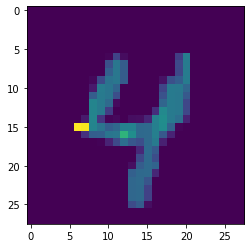

In [28]:
plt.imshow(Xtest[1111])

In [30]:
print(np.argmax(prediction[1111]))

4
